<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schelling model

In [3]:
import numpy as np
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt

Create class

In [4]:
class City(object):
    """ Class for city """
    AGENT1_cell = 0
    AGENT2_cell = 1
    FREE_cell = 2
    BORDER_cell = -1
    def __init__(self, N, r, num_agents=2):
        """ Initialize class """
        self.r = r
        self.N = N

        # Initialize map for 2 agents
        self.map = np.ones((self.N+2, self.N+2)) #to get borders
        self.map = self.map*self.BORDER_cell # make all cells free at the beggining
        for i in range(1,self.N+1):
          for j in range(1,self.N+1):
            if(np.random.rand() < 0.66):
              if(np.random.rand() < 0.5):
                self.map[i][j] = self.AGENT1_cell
              else:
                self.map[i][j] = self.AGENT2_cell
            else:
              self.map[i][j] = self.FREE_cell
    

    def plotCity(self):
      plt.figure(figsize=(5, 5))
      plt.title("White are free, black and purple are agents")
      plt.imshow(self.map[1:self.N+1,1:self.N+1], cmap=cm.gnuplot2, extent=(-2, 2, -2, 2))

    def calculateAndMove(self):
      toMove = []
      for i in range(1, self.N+1):
        for j in range(1, self.N+1):
          if(self.map[i][j] == self.AGENT1_cell or self.map[i][j] == self.AGENT2_cell):
            n1 = self.calculateNeighbours(i, j)
            if(n1 < self.r):
              toMove.append([i,j])
      self.moveAgents(toMove)
      return len(toMove)
    
    def moveAgents(self, toMove):
      for idx in toMove:
        freePlaces = np.where(self.map == self.FREE_cell)
        whereToMove = random.randint(0, len(freePlaces[0])-1)
        self.map[freePlaces[0][whereToMove]][freePlaces[1][whereToMove]] = self.map[idx[0]][idx[1]]
        self.map[idx[0]][idx[1]] = self.FREE_cell
        
    def calculateNeighbours(self, cur_i, cur_j):
        neighbours = []
        agentNum = self.map[cur_i][cur_j]
        start_i = cur_i - 1
        start_j = cur_j - 1
        for i in range(start_i, start_i + 3, 1):
            for j in range(start_j, start_j + 3, 1):
                if i == cur_i and j == cur_j:
                    continue
                else:
                    neighbours.append(self.map[i][j])
        numOfNeighbouringAgents = neighbours.count(agentNum)
        numOfNeighboursAround = neighbours.count(self.AGENT1_cell) \
            + neighbours.count(self.AGENT2_cell) \
            + neighbours.count(self.FREE_cell)
        return 1.0 * numOfNeighbouringAgents / numOfNeighboursAround

Try to create class instance and plot it

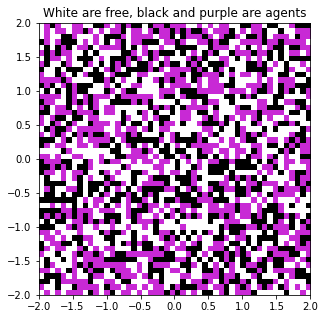

In [5]:
r = 0.5
city = City(50,r)
city.plotCity()

Try to move agents

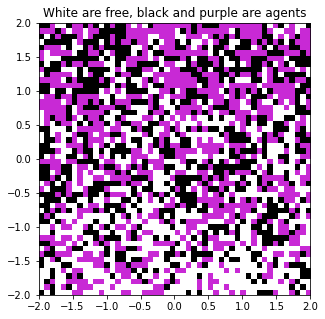

In [6]:
city.calculateAndMove()
city.plotCity()

# Create 9 gifs of map evolution for 9 values of R

In [18]:
import os
from tqdm import tqdm
import imageio

def save_img(fname):
  plt.savefig(fname)
  plt.close()

def createGIF(c_density, duration, name):
  images = []

  for i in range(c_density):
    city.calculateAndMove()
    plt.figure(figsize=(5, 5))
    plt.imshow(city.map[1:city.N+1,1:city.N+1], cmap=cm.gnuplot2, extent=(-2, 2, -2, 2))
    plt.title("R = {}".format(city.r))

    fname = f'{name}_{i}.png'
    save_img(fname)
    images.append(imageio.imread(fname))
    os.remove(fname)

  fname = f'{name}.gif'
  imageio.mimsave(fname, images, fps = c_density / duration)

#createGIF(50,10,'test')
#createGIF(50,10,f'drive/MyDrive/Colab Notebooks/gifs/test')
r = [0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 1]
for i in range(len(r)):
  city = City(100, r[i])
  steps = 50
  duration = 10
  name = f"drive/MyDrive/Colab Notebooks/gifs/city_{r[i]}"
  createGIF(steps, duration, name)

In [20]:
from IPython.display import HTML
HTML('<img src="images/task_3/city_0.gif">')

In [21]:
HTML('<img src="images/task_3/city_0.125.gif">')

In [22]:
HTML('<img src="images/task_3/city_0.25.gif">')

In [23]:
HTML('<img src="images/task_3/city_0.375.gif">')

In [24]:
HTML('<img src="images/task_3/city_0.5.gif">')

In [25]:
HTML('<img src="images/task_3/city_0.625.gif">')

In [26]:
HTML('<img src="images/task_3/city_0.75.gif">')

In [27]:
HTML('<img src="images/task_3/city_0.875.gif">')

In [28]:
HTML('<img src="images/task_3/city_1.gif">')

# Plot the number of households that want to move versus time for 9 values of R on one graph, label 9 curves, label the axes and title the graph.

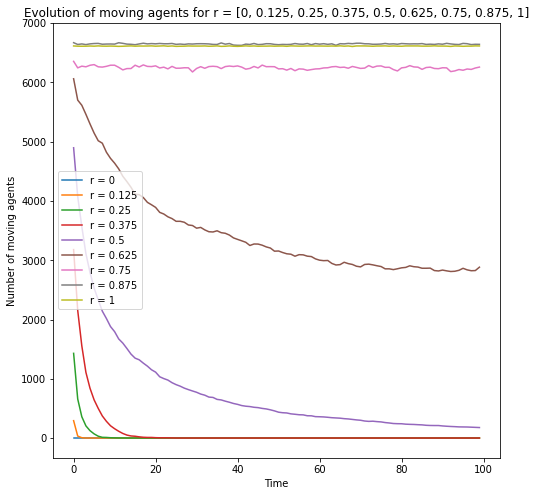

In [15]:
r = [0, 1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8, 1]
#r = [0, 1]
want_to_move = []
for r_val in r:
  city = City(50,r_val)
  c_density = 100
  n_moves = []
  for i in range(c_density):
      n_moves.append(city.calculateAndMove())
  want_to_move.append(n_moves)

plt.figure(figsize=(8, 8))
for i in range(len(want_to_move)):
  plt.plot(want_to_move[i],label="r = {}".format(r[i]))

plt.xlabel('Time')
plt.ylabel('Number of moving agents')
plt.title('Evolution of moving agents for r = {}'.format(r))
plt.legend()
plt.show()
